In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/near/RL-a/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


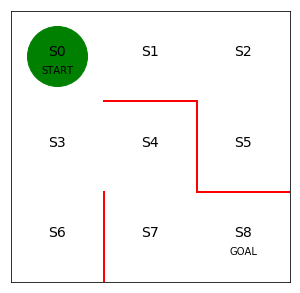

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:
# 方策パラメータthetaを行動方策piにソフトマックス関数で変換する手法の定義


def softmax_convert_into_pi_from_theta(theta):
    '''ソフトマックス関数で割合を計算する'''

    beta = 1.0
    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # thetaをexp(theta)へと変換

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # simpleに割合の計算の場合

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmaxで計算の場合

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

In [5]:
# 初期の方策pi_0を求める
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [6]:
# 行動aと1step移動後の状態sを求める関数を定義


def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    # pi[s,:]の確率に従って、directionが選択される
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return [action, s_next]

In [7]:
# 迷路を解く関数の定義、状態と行動の履歴を出力


def goal_maze_ret_s_a(pi):
    s = 0  # スタート地点
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        # 現在の状態（つまり一番最後なのでindex=-1）の行動を代入

        s_a_history.append([next_s, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return s_a_history

In [8]:
# 初期の方策で迷路を解く
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

In [9]:
# thetaの更新関数を定義します


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 学習率
    T = len(s_a_history) - 1  # ゴールまでの総ステップ数

    [m, n] = theta.shape  # thetaの行列サイズを取得
    delta_theta = theta.copy()  # Δthetaの元を作成、ポインタ参照なので、delta_theta = thetaはダメ

    # delta_thetaを要素ごとに求めます
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # thetaがnanでない場合

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 履歴から状態iのものを取り出すリスト内包表記です

                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                # 状態iで行動jをしたものを取り出す

                N_i = len(SA_i)  # 状態iで行動した総回数
                N_ij = len(SA_ij)  # 状態iで行動jをとった回数
                
                # 初版では符号の正負に間違いがありました（修正日：180703）
                #delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [10]:
# 方策の更新
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

In [13]:
# 方策勾配法で迷路を解く

# 初版で、def update_thetaに間違いがあった関係で、終了条件を変更します（修正日：180703）
#stop_epsilon = 10**-8  # 10^-8よりも方策に変化が少なくなったら学習終了とする
stop_epsilon = 10**-4  # 10^-4よりも方策に変化が少なくなったら学習終了とする


theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continueがFalseになるまで繰り返す
    s_a_history = goal_maze_ret_s_a(pi)  # 方策πで迷路内を探索した履歴を求める
    new_theta = update_theta(theta, pi, s_a_history)  # パラメータΘを更新
    new_pi = softmax_convert_into_pi_from_theta(new_theta)  # 方策πの更新

    print(np.sum(np.abs(new_pi - pi)))  # 方策の変化を出力
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.008795857834849707
迷路を解くのにかかったステップ数は84です
0.028177840844568036
迷路を解くのにかかったステップ数は14です
0.01211526412327929
迷路を解くのにかかったステップ数は12です
0.012233846571357676
迷路を解くのにかかったステップ数は40です
0.009730761070015914
迷路を解くのにかかったステップ数は74です
0.02449408039507439
迷路を解くのにかかったステップ数は10です
0.014715154133809305
迷路を解くのにかかったステップ数は30です
0.007961115815004915
迷路を解くのにかかったステップ数は32です
0.01099439437828087
迷路を解くのにかかったステップ数は98です
0.01647615343417702
迷路を解くのにかかったステップ数は24です
0.041218100242365
迷路を解くのにかかったステップ数は14です
0.018530300378888254
迷路を解くのにかかったステップ数は16です
0.011865110695997771
迷路を解くのにかかったステップ数は56です
0.024617345151266734
迷路を解くのにかかったステップ数は12です
0.011011687279498528
迷路を解くのにかかったステップ数は64です
0.015384333744351941
迷路を解くのにかかったステップ数は14です
0.011130841820688853
迷路を解くのにかかったステップ数は48です
0.031533533137171776
迷路を解くのにかかったステップ数は6です
0.0065492366942937474
迷路を解くのにかかったステップ数は78です
0.03209613105761239
迷路を解くのにかかったステップ数は6です
0.009086054571939117
迷路を解くのにかかったステップ数は62です
0.026185947615652072
迷路を解くのにかかったステップ数は20です
0.024196225336492738
迷路を解くのにかかったステップ数は12です
0.01092874554167983



迷路を解くのにかかったステップ数は30です
0.008076667125962278
迷路を解くのにかかったステップ数は56です
0.014715110566100031
迷路を解くのにかかったステップ数は38です
0.029822117856283803
迷路を解くのにかかったステップ数は6です
0.0076630943268878315
迷路を解くのにかかったステップ数は38です
0.032343392403682225
迷路を解くのにかかったステップ数は6です
0.009643577151369875


迷路を解くのにかかったステップ数は68です
0.03116613782866179
迷路を解くのにかかったステップ数は6です
0.044981931595538927
迷路を解くのにかかったステップ数は4です
0.0247182037016605
迷路を解くのにかかったステップ数は8です
0.03036690669411235
迷路を解くのにかかったステップ数は6です
0.01801784123651945
迷路を解くのにかかったステップ数は12です
0.012641274467455776
迷路を解くのにかかったステップ数は36です
0.012272755212540398
迷路を解くのにかかったステップ数は30です
0.010883238521067706
迷路を解くのにかかったステップ数は46です
0.010517490845815658
迷路を解くのにかかったステップ数は64です
0.043956251712232886
迷路を解くのにかかったステップ数は4です
0.017596990717887284
迷路を解くのにかかったステップ数は20です
0.026664775499159576
迷路を解くのにかかったステップ数は28です
0.007804355359653015
迷路を解くのにかかったステップ数は36です
0.01688982820416418
迷路を解くのにかかったステップ数は50です
0.015253698158606943
迷路を解くのにかかったステップ数は12です
0.007516281593873353
迷路を解くのにかかったステップ数は136です
0.007267339332966027
迷路を解くのにかかったステップ数は72です
0.043342189788010466
迷路を解くのにかかったステップ数は4です
0.011549534566777486
迷路を解くのにかかったステップ数は42です
0.011259321573626413
迷路を解くのにかかったステップ数は28です
0.021682372992048615
迷路を解くのにかかったステップ数は22です
0.01469074826409611
迷路を解くのにかかったステップ数は22です
0.012730325760662964
迷路を解くのにかかったステップ数は16です


0.018788013611407473
迷路を解くのにかかったステップ数は12です
0.013668577297535067
迷路を解くのにかかったステップ数は30です
0.01803747710388376
迷路を解くのにかかったステップ数は12です
0.012689582225773932
迷路を解くのにかかったステップ数は22です
0.013221375751146291
迷路を解くのにかかったステップ数は26です
0.016815336403157466
迷路を解くのにかかったステップ数は10です
0.02374357376721692
迷路を解くのにかかったステップ数は12です
0.040785726972768443
迷路を解くのにかかったステップ数は4です
0.023147124007321163
迷路を解くのにかかったステップ数は8です
0.017175833391398887
迷路を解くのにかかったステップ数は10です
0.039876844044372195
迷路を解くのにかかったステップ数は4です
0.015923576059672873
迷路を解くのにかかったステップ数は12です
0.01165801389206056
迷路を解くのにかかったステップ数は18です
0.02069853718847986
迷路を解くのにかかったステップ数は22です
0.012676889842313244
迷路を解くのにかかったステップ数は18です
0.03337679412090183
迷路を解くのにかかったステップ数は16です
0.010730233162998148
迷路を解くのにかかったステップ数は34です
0.02389344933739823
迷路を解くのにかかったステップ数は14です
0.01035308092150422
迷路を解くのにかかったステップ数は38です
0.028996099638226414
迷路を解くのにかかったステップ数は10です
0.01858077838955996
迷路を解くのにかかったステップ数は8です
0.012548302826588364
迷路を解くのにかかったステップ数は10です
0.011010130465309409
迷路を解くのにかかったステップ数は32です
0.024317241589761618
迷路

0.00899908879452696
迷路を解くのにかかったステップ数は14です
0.01420161727705227
迷路を解くのにかかったステップ数は20です
0.015024805647693013
迷路を解くのにかかったステップ数は16です
0.010656424548623145
迷路を解くのにかかったステップ数は40です
0.021527769169642025
迷路を解くのにかかったステップ数は10です
0.01771084822323543
迷路を解くのにかかったステップ数は8です
0.035276236731284716
迷路を解くのにかかったステップ数は4です


0.01185482776502586
迷路を解くのにかかったステップ数は14です
0.019411430096469173
迷路を解くのにかかったステップ数は18です
0.010352620846772853
迷路を解くのにかかったステップ数は16です
0.012808702617626566
迷路を解くのにかかったステップ数は16です
0.006837993690856581
迷路を解くのにかかったステップ数は30です
0.03474423751858488
迷路を解くのにかかったステップ数は4です
0.014231157138750838
迷路を解くのにかかったステップ数は48です
0.03434504640870492
迷路を解くのにかかったステップ数は4です
0.008673208424153867
迷路を解くのにかかったステップ数は12です
0.0253012936020873
迷路を解くのにかかったステップ数は6です
0.033609933166353245
迷路を解くのにかかったステップ数は4です
0.012741734145422956
迷路を解くのにかかったステップ数は20です
0.017405475413981075
迷路を解くのにかかったステップ数は14です
0.015006827965534292
迷路を解くのにかかったステップ数は30です
0.02907209486336576
迷路を解くのにかかったステップ数は6です
0.019423574357572942
迷路を解くのにかかったステップ数は6です
0.030642258436572922
迷路を解くのにかかったステップ数は6です
0.030200590830981727
迷路を解くのにかかったステップ数は12です
0.030027650870879996
迷路を解くのにかかったステップ数は16です
0.023732619053611542
迷路を解くのにかかったステップ数は24です
0.0136898520310616
迷路を解くのにかかったステップ数は28です
0.03292256704777302
迷路を解くのにかかったステップ数は4です
0.032452970833699274
迷路を解くのにかかったステップ数は4です
0.013011437500164202
迷路を解くのにか

0.0258555360321486
迷路を解くのにかかったステップ数は14です
0.010573541477942955
迷路を解くのにかかったステップ数は14です
0.017413497556506646
迷路を解くのにかかったステップ数は10です
0.022565350909372894
迷路を解くのにかかったステップ数は10です
0.017343718502326272
迷路を解くのにかかったステップ数は8です
0.012539670265687308
迷路を解くのにかかったステップ数は16です
0.025017898861472154
迷路を解くのにかかったステップ数は4です
0.024657577292082233
迷路を解くのにかかったステップ数は4です
0.021309725287079306
迷路を解くのにかかったステップ数は6です
0.01775794040631551
迷路を解くのにかかったステップ数は14です
0.024129885238910215
迷路を解くのにかかったステップ数は6です
0.02412567881949121
迷路を解くのにかかったステップ数は4です
0.026984502486318424
迷路を解くのにかかったステップ数は6です
0.023605720355082266
迷路を解くのにかかったステップ数は6です
0.021157268732221374
迷路を解くのにかかったステップ数は6です
0.016690774070951847
迷路を解くのにかかったステップ数は8です
0.028681434458684846
迷路を解くのにかかったステップ数は8です
0.01949768412396749
迷路を解くのにかかったステップ数は8です
0.020897457611363968
迷路を解くのにかかったステップ数は10です
0.014913275383203028
迷路を解くのにかかったステップ数は6です
0.023178293849985016
迷路を解くのにかかったステップ数は4です
0.011381429232040635
迷路を解くのにかかったステップ数は14です
0.022951735707895188
迷路を解くのにかかったステップ数は4です
0.011883311856238421
迷路を解くのにかかっ


迷路を解くのにかかったステップ数は12です
0.023842777072356713
迷路を解くのにかかったステップ数は6です
0.01468394863717909
迷路を解くのにかかったステップ数は8です
0.010735471377058076
迷路を解くのにかかったステップ数は12です
0.027916054629304826
迷路を解くのにかかったステップ数は16です
0.018026430112432407
迷路を解くのにかかったステップ数は10です
0.012073153851179186
迷路を解くのにかかったステップ数は6です
0.017814422204449037
迷路を解くのにかかったステップ数は4です
0.01645372322300967
迷路を解くのにかかったステップ数は10です
0.017632008399264876
迷路を解くのにかかったステップ数は4です


0.011793848027733561
迷路を解くのにかかったステップ数は6です
0.01733306273833124
迷路を解くのにかかったステップ数は4です
0.023446250370081273
迷路を解くのにかかったステップ数は6です
0.01754466845491895
迷路を解くのにかかったステップ数は10です
0.01714358131352897
迷路を解くのにかかったステップ数は4です
0.016910106900194094
迷路を解くのにかかったステップ数は4です
0.01668031117027924
迷路を解くのにかかったステップ数は4です
0.022467011515218044
迷路を解くのにかかったステップ数は14です
0.016567178021787005
迷路を解くのにかかったステップ数は4です
0.012953685819191707
迷路を解くのにかかったステップ数は6です
0.015663859907270594
迷路を解くのにかかったステップ数は8です
0.015385368338141692
迷路を解くのにかかったステップ数は10です
0.016275345224661175
迷路を解くのにかかったステップ数は4です
0.01605706886269831
迷路を解くのにかかったステップ数は4です
0.015842205488590916
迷路を解くのにかかったステップ数は4です
0.022364997981536794
迷路を解くのにかかったステップ数は6です
0.015753774855744668
迷路を解くのにかかったステップ数は22です
0.015620671450241874
迷路を解くのにかかったステップ数は4です
0.022205241295421813
迷路を解くのにかかったステップ数は6です
0.015382394391925791
迷路を解くのにかかったステップ数は4です
0.01627524088108523
迷路を解くのにかかったステップ数は6です
0.010891426000149695
迷路を解くのにかかったステップ数は6です
0.01451615069937362
迷路を解くのにかかったステップ数は18です
0.022861749860872166
迷路を解くのにかかったステップ


迷路を解くのにかかったステップ数は4です
0.014572129140587947
迷路を解くのにかかったステップ数は6です
0.014467759408511138
迷路を解くのにかかったステップ数は6です
0.013290981791354156
迷路を解くのにかかったステップ数は4です
0.010156870318487221
迷路を解くのにかかったステップ数は6です
0.013098798855782523
迷路を解くのにかかったステップ数は4です
0.020731193689337457
迷路を解くのにかかったステップ数は6です
0.0117094053297912
迷路を解くのにかかったステップ数は8です
0.010091007278660857
迷路を解くのにかかったステップ数は6です
0.012952415866432171
迷路を解くのにかかったステップ数は4です
0.012784833715246885
迷路を解くのにかかったステップ数は4です
0.010810963020521647
迷路を解くのにかかったステップ数は6です
0.012585566210831622
迷路を解くのにかかったステップ数は4です
0.01819284485641043
迷路を解くのにかかったステップ数は8です
0.012509930202206893
迷路を解くのにかかったステップ数は4です
0.012349248122022982
迷路を解くのにかかったステップ数は4です
0.013937448955214704
迷路を解くのにかかったステップ数は8です
0.012235952795632443
迷路を解くのにかかったステップ数は4です
0.012079358365644277
迷路を解くのにかかったステップ数は4です
0.011925315042600831
迷路を解くのにかかったステップ数は4です
0.015816356342118754
迷路を解くのにかかったステップ数は12です
0.011842704300819268
迷路を解くのにかかったステップ数は4です
0.011692333817955425
迷路を解くのにかかったステップ数は4です
0.009466433047713607
迷路を解くのにかかったステップ数は8です
0.011582012731

0.018539336980090387


迷路を解くのにかかったステップ数は38です
0.00918254950189619
迷路を解くのにかかったステップ数は4です
0.01198707966746626
迷路を解くのにかかったステップ数は6です
0.009088173660400267
迷路を解くのにかかったステップ数は4です
0.008982335919433301
迷路を解くのにかかったステップ数は4です
0.008878134969465767
迷路を解くのにかかったステップ数は4です
0.008775541759138875
迷路を解くのにかかったステップ数は4です
0.01753165975976878
迷路を解くのにかかったステップ数は6です
0.00866463969654828
迷路を解くのにかかったステップ数は4です
0.019288880712989342
迷路を解くのにかかったステップ数は10です
0.008660124221115534
迷路を解くのにかかったステップ数は4です
0.008560862122413401
迷路を解くのにかかったステップ数は4です
0.008463124316501883
迷路を解くのにかかったステップ数は4です
0.008366883512290896
迷路を解くのにかかったステップ数は4です
0.008272112918696145
迷路を解くのにかかったステップ数は4です
0.008178786237675081
迷路を解くのにかかったステップ数は4です
0.008240103513992653
迷路を解くのにかかったステップ数は6です
0.00822953616360711
迷路を解くのにかかったステップ数は6です
0.008130291827210742
迷路を解くのにかかったステップ数は4です
0.008039189849875741
迷路を解くのにかかったステップ数は4です
0.007949460959286767
迷路を解くのにかかったステップ数は4です
0.010986747404150718
迷路を解くのにかかったステップ数は6です
0.007881837172578565
迷路を解くのにかかったステップ数は4です
0.008427582072266154
迷路を解くのにかかったステップ数は6です
0.0127623438114


迷路を解くのにかかったステップ数は8です
0.01019772469051411
迷路を解くのにかかったステップ数は6です
0.00711767150467664
迷路を解くのにかかったステップ数は4です
0.00704026499783085
迷路を解くのにかかったステップ数は4です
0.0069640093594227626
迷路を解くのにかかったステップ数は4です
0.00809725692317445
迷路を解くのにかかったステップ数は8です
0.006926559619291603
迷路を解くのにかかったステップ数は4です
0.006852070015385944
迷路を解くのにかかったステップ数は4です
0.006778678029791402
迷路を解くのにかかったステップ数は4です
0.006706364305384863
迷路を解くのにかかったステップ数は4です
0.012783384687123034
迷路を解くのにかかったステップ数は10です
0.006752024244060115
迷路を解くのにかかったステップ数は4です
0.007699377643751726
迷路を解くのにかかったステップ数は6です
0.006709861444349027
迷路を解くのにかかったステップ数は4です
0.006638362366290826
迷路を解くのにかかったステップ数は4です
0.010614868678984105
迷路を解くのにかかったステップ数は6です
0.006554511394584406
迷路を解くのにかかったステップ数は4です
0.006485360255153005
迷路を解くのにかかったステップ数は4です
0.014126093548325155
迷路を解くのにかかったステップ数は12です
0.006535969728682492
迷路を解くのにかかったステップ数は4です
0.006467113361975335
迷路を解くのにかかったステップ数は4です
0.0063992544075056335
迷路を解くのにかかったステップ数は4です
0.006332375506517218
迷路を解くのにかかったステップ数は4です
0.006266459626244933
迷路を解くのにかかったステップ数は4です
0.0062014900


迷路を解くのにかかったステップ数は4です
0.004622849643162702
迷路を解くのにかかったステップ数は4です
0.004580495353874378
迷路を解くのにかかったステップ数は4です
0.004538690189164404
迷路を解くのにかかったステップ数は4です
0.004497425223294424
迷路を解くのにかかったステップ数は4です
0.012968950937596743
迷路を解くのにかかったステップ数は10です
0.012208869190455135
迷路を解くのにかかったステップ数は8です
0.004480801493861278
迷路を解くのにかかったステップ数は4です
0.014106334984635524
迷路を解くのにかかったステップ数は12です
0.004501352373113027
迷路を解くのにかかったステップ数は4です
0.004460664980272297
迷路を解くのにかかったステップ数は4です
0.004420499248343354
迷路を解くのにかかったステップ数は4です
0.007451902785497677
迷路を解くのにかかったステップ数は10です
0.004384183682752563
迷路を解くのにかかったステップ数は4です
0.004345042037695604
迷路を解くのにかかったステップ数は4です
0.004306396617031735
迷路を解くのにかかったステップ数は4です
0.004268239486932349
迷路を解くのにかかったステップ数は4です
0.004230562862444526
迷路を解くのにかかったステップ数は4です
0.013220072100367616
迷路を解くのにかかったステップ数は6です
0.00786090530773989
迷路を解くのにかかったステップ数は6です
0.004232673860591937
迷路を解くのにかかったステップ数は4です
0.004195429217488389
迷路を解くのにかかったステップ数は4です
0.004158651248929321
迷路を解くのにかかったステップ数は4です
0.004122332553037636
迷路を解くのにかかったステップ数は4です
0.00778457


迷路を解くのにかかったステップ数は4です
0.003495024518377479
迷路を解くのにかかったステップ数は4です
0.0034664940677879563
迷路を解くのにかかったステップ数は4です
0.0034382989734903224
迷路を解くのにかかったステップ数は4です
0.003410434187153602
迷路を解くのにかかったステップ数は4です
0.006033884133804068
迷路を解くのにかかったステップ数は6です
0.0034047553664622726
迷路を解くのにかかったステップ数は4です
0.0033772810374305684
迷路を解くのにかかったステップ数は4です
0.003350126007089241
迷路を解くのにかかったステップ数は4です
0.0033232855232743497
迷路を解くのにかかったステップ数は4です
0.0032967549184087647
迷路を解くのにかかったステップ数は4です
0.003270529607786038
迷路を解くのにかかったステップ数は4です
0.003244605087894953
迷路を解くのにかかったステップ数は4です
0.003218976934779183
迷路を解くのにかかったステップ数は4です
0.0031936408024343527
迷路を解くのにかかったステップ数は4です
0.00316859242124079
迷路を解くのにかかったステップ数は4です
0.003143827596428811
迷路を解くのにかかったステップ数は4です
0.0031193422065794035
迷路を解くのにかかったステップ数は4です
0.0030951322021586652
迷路を解くのにかかったステップ数は4です
0.006942907846675284
迷路を解くのにかかったステップ数は10です
0.006693782347361565
迷路を解くのにかかったステップ数は6です
0.006755128074449293
迷路を解くのにかかったステップ数は6です
0.0031405393743986904
迷路を解くのにかかったステップ数は4です
0.007814972025709507
迷路を解くのにかかったステップ数は8です
0.

0.004835195084208925
迷路を解くのにかかったステップ数は6です
0.00471886288235749
迷路を解くのにかかったステップ数は6です
0.004922188198080206
迷路を解くのにかかったステップ数は6です
0.007986311662505234
迷路を解くのにかかったステップ数は10です
0.004833107920081715
迷路を解くのにかかったステップ数は6です
0.00215927729513702
迷路を解くのにかかったステップ数は4です
0.002144877848317933
迷路を解くのにかかったステップ数は4です
0.004855401259305482
迷路を解くのにかかったステップ数は6です
0.0021526204485212974
迷路を解くのにかかったステップ数は4です
0.0021382812980692348
迷路を解くのにかかったステップ数は4です
0.0021240823093603006
迷路を解くのにかかったステップ数は4です
0.008031969810424124
迷路を解くのにかかったステップ数は8です
0.002157447985104026
迷路を解くのにかかったステップ数は4です
0.002142987497034461
迷路を解くのにかかったステップ数は4です
0.002128669651668663
迷路を解くのにかかったステップ数は4です
0.0021144926084692983
迷路を解くのにかかったステップ数は4です
0.002100454555959204
迷路を解くのにかかったステップ数は4です
0.0020865537111860663
迷路を解くのにかかったステップ数は4です
0.0020727883191942534
迷路を解くのにかかったステップ数は4です
0.002059156652511801
迷路を解くのにかかったステップ数は4です
0.005883742287630327
迷路を解くのにかかったステップ数は20です
0.00205834779902421
迷路を解くのにかかったステップ数は4です
0.002044888906060631
迷路を解くのにかかったステップ数は4です
0.002031559523462151
迷路を解くのにか

0.001628316351704115
迷路を解くのにかかったステップ数は4です
0.007850077082286841
迷路を解くのにかかったステップ数は10です
0.004188786155855551
迷路を解くのにかかったステップ数は6です
0.0016834857890639723
迷路を解くのにかかったステップ数は4です
0.0016731312059820105
迷路を解くのにかかったステップ数は4です
0.0016628723359841946
迷路を解くのにかかったステップ数は4です
0.0016527080004031247
迷路を解くのにかかったステップ数は4です
0.005156702724862634
迷路を解くのにかかったステップ数は6です
0.0016710199140284807
迷路を解くのにかかったステップ数は4です
0.0016607217824384374
迷路を解くのにかかったステップ数は4です
0.006129173850429326
迷路を解くのにかかったステップ数は10です
0.0016868921787259045
迷路を解くのにかかったステップ数は4です
0.0016764412423123237
迷路を解くのにかかったステップ数は4です
0.005719889713299994
迷路を解くのにかかったステップ数は10です
0.005225400518496223
迷路を解くのにかかったステップ数は6です
0.0016988284392625633
迷路を解くのにかかったステップ数は4です
0.0016882245946368765
迷路を解くのにかかったステップ数は4です
0.001677720792589231
迷路を解くのにかかったステップ数は4です
0.009663909271239793
迷路を解くのにかかったステップ数は8です
0.0016714545767600592
迷路を解くのにかかったステップ数は4です
0.0016611357122611747
迷路を解くのにかかったステップ数は4です
0.0016509130598258148
迷路を解くのにかかったステップ数は4です
0.0016407854195147342
迷路を解くのにかかったステップ数は4です
0.005183009557082

0.010306340105992587
迷路を解くのにかかったステップ数は6です
0.001503495868040848
迷路を解くのにかかったステップ数は4です
0.0014948633962390892
迷路を解くのにかかったステップ数は4です
0.0014863049923069735
迷路を解くのにかかったステップ数は4です
0.0014778198121415329
迷路を解くのにかかったステップ数は4です
0.0014694070235948542
迷路を解くのにかかったステップ数は4です
0.0014610658062733511
迷路を解くのにかかったステップ数は4です
0.0014527953513391173
迷路を解くのにかかったステップ数は4です
0.0014445948613168655
迷路を解くのにかかったステップ数は4です
0.0014364635499036355
迷路を解くのにかかったステップ数は4です
0.0014284006417819503
迷路を解くのにかかったステップ数は4です
0.001420405372440807
迷路を解くのにかかったステップ数は4です
0.0014124769879889573
迷路を解くのにかかったステップ数は4です
0.001404614744987355
迷路を解くのにかかったステップ数は4です
0.001396817910271686
迷路を解くのにかかったステップ数は4です
0.010161420091854764
迷路を解くのにかかったステップ数は6です
0.0013950361427873884
迷路を解くのにかかったステップ数は4です
0.0013873431083837734
迷路を解くのにかかったステップ数は4です
0.0013797134138633788
迷路を解くのにかかったステップ数は4です
0.0013721463665780712
迷路を解くのにかかったステップ数は4です
0.0013646412832968718
迷路を解くのにかかったステップ数は4です
0.0013571974900570272
迷路を解くのにかかったステップ数は4です
0.0013498143220148848
迷路を解くのにかかったステップ数は4です
0.009263158429390

0.0010837486380180783
迷路を解くのにかかったステップ数は4です
0.0010783920481440765
迷路を解くのにかかったステップ数は4です
0.0033955257697764266
迷路を解くのにかかったステップ数は6です
0.001083961410680713
迷路を解くのにかかったステップ数は4です
0.0010786085082396882
迷路を解くのにかかったステップ数は4です
0.0010732953398284104
迷路を解くのにかかったステップ数は4です
0.004126151723043224
迷路を解くのにかかったステップ数は6です
0.003442535521709325
迷路を解くのにかかったステップ数は6です
0.001098895104467569
迷路を解くのにかかったステップ数は4です
0.0034872410757841935
迷路を解くのにかかったステップ数は6です
0.0035407322918208917
迷路を解くのにかかったステップ数は6です
0.0011193998258988772
迷路を解くのにかかったステップ数は4です
0.0011137649007487843
迷路を解くのにかかったステップ数は4です
0.0011081725795843017
迷路を解くのにかかったステップ数は4です
0.0011026224331816686
迷路を解くのにかかったステップ数は4です
0.001097114037704218
迷路を解くのにかかったステップ数は4です
0.004143525747733641
迷路を解くのにかかったステップ数は6です
0.00967631014369031
迷路を解くのにかかったステップ数は6です
0.001115006607567269
迷路を解くのにかかったステップ数は4です
0.00419399652438468
迷路を解くのにかかったステップ数は8です
0.0011256542372350131
迷路を解くのにかかったステップ数は4です
0.009657517016380138
迷路を解くのにかかったステップ数は6です
0.001125029277838828
迷路を解くのにかかったステップ数は4です
0.0011193790204546486
迷路


迷路を解くのにかかったステップ数は4です
0.0008023483025833278
迷路を解くのにかかったステップ数は4です
0.0007989118308451455
迷路を解くのにかかったステップ数は4です
0.0007954975484906861
迷路を解くのにかかったステップ数は4です
0.0007921052636782819
迷路を解くのにかかったステップ数は4です
0.0007887347866454252
迷路を解くのにかかったステップ数は4です
0.003514947459104578
迷路を解くのにかかったステップ数は6です
0.0007997309153625828
迷路を解くのにかかったステップ数は4です
0.0007962938034187898
迷路を解くのにかかったステップ数は4です
0.000792879030085597
迷路を解くのにかかったステップ数は4です
0.0007894864004558411
迷路を解くのにかかったステップ数は4です
0.0007861157217612658
迷路を解くのにかかったステップ数は4です
0.0007827668033365855
迷路を解くのにかかったステップ数は4です
0.009061874503566315
迷路を解くのにかかったステップ数は6です
0.0007852128761984233
迷路を解くのにかかったステップ数は4です
0.0007818799276929911
迷路を解くのにかかったステップ数は4です
0.000778568337380884
迷路を解くのにかかったステップ数は4です
0.0007752779217257491
迷路を解くのにかかったステップ数は4です
0.0035719713636914903
迷路を解くのにかかったステップ数は8です
0.0007785838700805452
迷路を解くのにかかったステップ数は4です
0.0007753099616416778
迷路を解くのにかかったステップ数は4です
0.0007720568021400073
迷路を解くのにかかったステップ数は4です
0.000768824215366018
迷路を解くのにかかったステップ数は4です
0.0007656120269882195
迷路を解くのにかかったステップ


迷路を解くのにかかったステップ数は8です
0.0006412581646509374
迷路を解くのにかかったステップ数は4です
0.002362855584546287
迷路を解くのにかかったステップ数は6です
0.0006421471095598083
迷路を解くのにかかったステップ数は4です
0.0006397101141635796
迷路を解くのにかかったステップ数は4です
0.0006372869951716334
迷路を解くのにかかったステップ数は4です
0.0006348776471222541
迷路を解くのにかかったステップ数は4です
0.0027114589826094
迷路を解くのにかかったステップ数は6です
0.0006409463571165341
迷路を解くのにかかったステップ数は4です
0.0006385159950719373
迷路を解くのにかかったステップ数は4です
0.0032230351795289047
迷路を解くのにかかったステップ数は8です
0.0006455787891100004
迷路を解くのにかかったステップ数は4です
0.0006431276121032191
迷路を解くのにかかったステップ数は4です
0.0006406903736198323
迷路を解くのにかかったステップ数は4です
0.0006382669680742234
迷路を解くのにかかったステップ数は4です
0.0006358572908806495
迷路を解くのにかかったステップ数は4です
0.0006334612384399085
迷路を解くのにかかったステップ数は4です
0.0006310787081283721
迷路を解くのにかかったステップ数は4です
0.00062870959828824
迷路を解くのにかかったステップ数は4です
0.0006263538082149807
迷路を解くのにかかったステップ数は4です
0.0006240112381478008
迷路を解くのにかかったステップ数は4です
0.0006216817892579669
迷路を解くのにかかったステップ数は4です
0.0006193653636410966
迷路を解くのにかかったステップ数は4です
0.0006170618643018613
迷路を解くのにかかったステップ数


迷路を解くのにかかったステップ数は4です
0.0005722582016199976
迷路を解くのにかかったステップ数は4です
0.0005702458462304438
迷路を解くのにかかったステップ数は4です
0.0005682439956458882
迷路を解くのにかかったステップ数は4です
0.0005662525773337777
迷路を解くのにかかったステップ数は4です
0.000564271519382941
迷路を解くのにかかったステップ数は4です
0.0005623007504984706
迷路を解くのにかかったステップ数は4です
0.0005603401999930424
迷路を解くのにかかったステップ数は4です
0.0005583897977844907
迷路を解くのにかかったステップ数は4です
0.0005564494743847924
迷路を解くのにかかったステップ数は4です
0.0005545191608996788
迷路を解くのにかかったステップ数は4です
0.0005525987890169122
迷路を解くのにかかったステップ数は4です
0.0005506882910044919
迷路を解くのにかかったステップ数は4です
0.0005487875997040002
迷路を解くのにかかったステップ数は4です
0.0005468966485219634
迷路を解くのにかかったステップ数は4です
0.0005450153714292617
迷路を解くのにかかったステップ数は4です
0.0005431437029498228
迷路を解くのにかかったステップ数は4です
0.0005412815781600869
迷路を解くのにかかったステップ数は4です
0.0005394289326802262
迷路を解くのにかかったステップ数は4です
0.0005375857026694089
迷路を解くのにかかったステップ数は4です
0.0005357518248213095
迷路を解くのにかかったステップ数は4です
0.0005339272363583288
迷路を解くのにかかったステップ数は4です
0.000532111875025186
迷路を解くのにかかったステップ数は4です
0.0005303056790857477
迷路を解くのにかかったス


迷路を解くのにかかったステップ数は4です
0.007823623491841084
迷路を解くのにかかったステップ数は6です
0.00048651723051237536
迷路を解くのにかかったステップ数は4です
0.00221954004672361
迷路を解くのにかかったステップ数は6です
0.0004900304913912981
迷路を解くのにかかったステップ数は4です
0.0004884336913860941
迷路を解くのにかかったステップ数は4です
0.0004868446157309317
迷路を解くのにかかったステップ数は4です
0.00048526321500848985
迷路を解くのにかかったステップ数は4です
0.0004836894401933217
迷路を解くのにかかったステップ数は4です
0.0004821232426490199
迷路を解くのにかかったステップ数は4です
0.0004805645741245805
迷路を解くのにかかったステップ数は4です
0.0004790133867498096
迷路を解くのにかかったステップ数は4です
0.00047746963303248874
迷路を解くのにかかったステップ数は4です
0.00047593326585533904
迷路を解くのにかかったステップ数は4です
0.0004744042384699221
迷路を解くのにかかったステップ数は4です
0.0004728825044980553
迷路を解くのにかかったステップ数は4です
0.00047136801792324254
迷路を解くのにかかったステップ数は4です
0.0004698607330895013
迷路を解くのにかかったステップ数は4です
0.0004683606046987157
迷路を解くのにかかったステップ数は4です
0.0004668675878058033
迷路を解くのにかかったステップ数は4です
0.00046538163781765715
迷路を解くのにかかったステップ数は4です
0.0004639027104856343
迷路を解くのにかかったステップ数は4です
0.00046243076190695745
迷路を解くのにかかったステップ数は4です
0.0004609657485199585
迷路を解くの


迷路を解くのにかかったステップ数は4です
0.00039731013687976935
迷路を解くのにかかったステップ数は4です
0.0020506075773677676
迷路を解くのにかかったステップ数は6です
0.0004010187604119621
迷路を解くのにかかったステップ数は4です
0.00039983913537423865
迷路を解くのにかかったステップ数は4です
0.000398664652983851
迷路を解くのにかかったステップ数は4です
0.00039749528363101916
迷路を解くのにかかったステップ数は4です
0.0022339686444387274
迷路を解くのにかかったステップ数は6です
0.0004018033833819712
迷路を解くのにかかったステップ数は4です
0.0020801770121101175
迷路を解くのにかかったステップ数は6です
0.00040565464167565193
迷路を解くのにかかったステップ数は4です
0.0004044531953021624
迷路を解くのにかかったステップ数は4です
0.000403257026082994
迷路を解くのにかかったステップ数は4です
0.0022743502339656607
迷路を解くのにかかったステップ数は6です
0.00040780190593076027
迷路を解くのにかかったステップ数は4です
0.0004065887668045255
迷路を解くのにかかったステップ数は4です
0.00040538098637634204
迷路を解くのにかかったステップ数は4です
0.000404178533323727
迷路を解くのにかかったステップ数は4です
0.00040298137655236585
迷路を解くのにかかったステップ数は4です
0.00040178948519511287
迷路を解くのにかかったステップ数は4です
0.0020669970887985632
迷路を解くのにかかったステップ数は6です
0.0004046358325958087
迷路を解くのにかかったステップ数は4です
0.0004034380549761442
迷路を解くのにかかったステップ数は4です
0.00040224553868294446
迷路を解


迷路を解くのにかかったステップ数は4です
0.00035052247355943714
迷路を解くのにかかったステップ数は4です
0.00034955477529284226
迷路を解くのにかかったステップ数は4です
0.0003485910435310005
迷路を解くのにかかったステップ数は4です
0.00034763125676577286
迷路を解くのにかかったステップ数は4です
0.0003466753936330509
迷路を解くのにかかったステップ数は4です
0.0003457234329132079
迷路を解くのにかかったステップ数は4です
0.00034477535352836486
迷路を解くのにかかったステップ数は4です
0.0003438311345430739
迷路を解くのにかかったステップ数は4です
0.0003428907551606443
迷路を解くのにかかったステップ数は4です
0.0003419541947254322
迷路を解くのにかかったステップ数は4です
0.0003410214327170119
迷路を解くのにかかったステップ数は4です
0.00034009244875609496
迷路を解くのにかかったステップ数は4です
0.0003391672225949542
迷路を解くのにかかったステップ数は4です
0.0003382457341233082
迷路を解くのにかかったステップ数は4です
0.0003373279633633562
迷路を解くのにかかったステップ数は4です
0.00033641389047025724
迷路を解くのにかかったステップ数は4です
0.0019346151994440695
迷路を解くのにかかったステップ数は6です
0.0003393289477606337
迷路を解くのにかかったステップ数は4です
0.00033840725225968774
迷路を解くのにかかったステップ数は4です
0.0003374892731851896
迷路を解くのにかかったステップ数は4です
0.00033657499071884645
迷路を解くのにかかったステップ数は4です
0.000335664385168636
迷路を解くのにかかったステップ数は4です
0.00033475743697917656
迷路


迷路を解くのにかかったステップ数は4です
0.0002763228710767861
迷路を解くのにかかったステップ数は4です
0.0002756437676589892
迷路を解くのにかかったステップ数は4です
0.00027496714331404215
迷路を解くのにかかったステップ数は4です
0.0002742929860687065
迷路を解くのにかかったステップ数は4です
0.00027362128402068885
迷路を解くのにかかったステップ数は4です
0.0002729520253399696
迷路を解くのにかかったステップ数は4です
0.0002722851982665687
迷路を解くのにかかったステップ数は4です
0.0002716207911111039
迷路を解くのにかかったステップ数は4です
0.0002709587922538944
迷路を解くのにかかったステップ数は4です
0.0002702991901448841
迷路を解くのにかかったステップ数は4です
0.00026964197330167465
迷路を解くのにかかったステップ数は4です
0.0002689871303121049
迷路を解くのにかかったステップ数は4です
0.0002683346498302073
迷路を解くのにかかったステップ数は4です
0.0002676845205778367
迷路を解くのにかかったステップ数は4です
0.0002670367313442109
迷路を解くのにかかったステップ数は4です
0.00026639127098399516
迷路を解くのにかかったステップ数は4です
0.00026574812841836937
迷路を解くのにかかったステップ数は4です
0.00026510729263417784
迷路を解くのにかかったステップ数は4です
0.00026446875268349747
迷路を解くのにかかったステップ数は4です
0.000263832497681183
迷路を解くのにかかったステップ数は4です
0.00026319851680894554
迷路を解くのにかかったステップ数は4です
0.000262566799309449
迷路を解くのにかかったステップ数は4です
0.00237019028996582
迷路を解くの


迷路を解くのにかかったステップ数は4です
0.00027805669536914643
迷路を解くのにかかったステップ数は4です
0.00027737011172965925
迷路を解くのにかかったステップ数は4です
0.000276686048796642
迷路を解くのにかかったステップ数は4です
0.00027600449431572707
迷路を解くのにかかったステップ数は4です
0.0002753254361072717
迷路を解くのにかかったステップ数は4です
0.00027464886206323043
迷路を解くのにかかったステップ数は4です
0.00027397476015194287
迷路を解くのにかかったステップ数は4です
0.0002733031184097238
迷路を解くのにかかったステップ数は4です
0.0002726339249486797
迷路を解くのにかかったステップ数は4です
0.0002719671679504206
迷路を解くのにかかったステップ数は4です
0.00027130283566914083
迷路を解くのにかかったステップ数は4です
0.0002706409164254745
迷路を解くのにかかったステップ数は4です
0.0002699813986144703
迷路を解くのにかかったステップ数は4です
0.0002693242706988605
迷路を解くのにかかったステップ数は4です
0.00026866952120950006
迷路を解くのにかかったステップ数は4です
0.00026801713874631886
迷路を解くのにかかったステップ数は4です
0.00026736711197752547
迷路を解くのにかかったステップ数は4です
0.0002667194296368143
迷路を解くのにかかったステップ数は4です
0.00026607408052867383
迷路を解くのにかかったステップ数は4です
0.00026543105351991246
迷路を解くのにかかったステップ数は4です
0.00026479033754645
迷路を解くのにかかったステップ数は4です
0.000264151921606684
迷路を解くのにかかったステップ数は4です
0.0030191122468408577
迷路を

0.0002270679646704868
迷路を解くのにかかったステップ数は4です
0.0002265578136234174
迷路を解くのにかかったステップ数は4です
0.0002260493739128875
迷路を解くのにかかったステップ数は4です
0.00022554263790379447
迷路を解くのにかかったステップ数は4です
0.00022503759800507166
迷路を解くのにかかったステップ数は4です
0.0015718571105989392
迷路を解くのにかかったステップ数は6です
0.00022762925471148283
迷路を解くのにかかったステップ数は4です
0.0023321286305597547
迷路を解くのにかかったステップ数は8です
0.00023253019487459205
迷路を解くのにかかったステップ数は4です
0.00023200052342498348
迷路を解くのにかかったステップ数は4です
0.00023147265516793025
迷路を解くのにかかったステップ数は4です
0.00023094658193364807
迷路を解くのにかかったステップ数は4です
0.00023042229559927692
迷路を解くのにかかったステップ数は4です
0.00022989978808715499
迷路を解くのにかかったステップ数は4です
0.00022937905136651005
迷路を解くのにかかったステップ数は4です
0.0002288600774494054
迷路を解くのにかかったステップ数は4です
0.00022834285839608628
迷路を解くのにかかったステップ数は4です
0.00022782738630856315
迷路を解くのにかかったステップ数は4です
0.00022731365333504734
迷路を解くのにかかったステップ数は4です
0.0002268016516667696
迷路を解くのにかかったステップ数は4です
0.000226291373540655
迷路を解くのにかかったステップ数は4です
0.00022578281123344923
迷路を解くのにかかったステップ数は4です
0.0015275016380853976
迷路を解くのにかかったステップ数は6で

0.0002059490717415454
迷路を解くのにかかったステップ数は4です
0.0002055060063195467
迷路を解くのにかかったステップ数は4です
0.00020506436806117315
迷路を解くのにかかったステップ数は4です
0.0002046241508382573
迷路を解くのにかかったステップ数は4です
0.0002041853485556886
迷路を解くのにかかったステップ数は4です
0.00020374795515128857
迷路を解くのにかかったステップ数は4です
0.0016937593900774265
迷路を解くのにかかったステップ数は6です
0.00020678172978856428
迷路を解くのにかかったステップ数は4です
0.00020633452318337756
迷路を解くのにかかったステップ数は4です
0.00020588876800392043
迷路を解くのにかかったステップ数は4です
0.00020544445795645308
迷路を解くのにかかったステップ数は4です
0.00020500158678048337
迷路を解くのにかかったステップ数は4です
0.001521701226352274
迷路を解くのにかかったステップ数は6です
0.00020749838788793745
迷路を解くのにかかったステップ数は4です
0.0002070488450134876
迷路を解くのにかかったステップ数は4です
0.00020660076316630221
迷路を解くのにかかったステップ数は4です
0.0002061541360054986
迷路を解くのにかかったステップ数は4です
0.0014646940705902757
迷路を解くのにかかったステップ数は6です
0.0002084055517512732
迷路を解くのにかかったステップ数は4です
0.00020795302045832458
迷路を解くのにかかったステップ数は4です
0.00020750196298608727
迷路を解くのにかかったステップ数は4です
0.00020705237292590814
迷路を解くのにかかったステップ数は4です
0.0002066042439066041
迷路を解くのにかかったステップ数は4です



迷路を解くのにかかったステップ数は4です
0.00019167839379290175
迷路を解くのにかかったステップ数は4です
0.0001912820243529182
迷路を解くのにかかったステップ数は4です
0.00019088687921392684
迷路を解くのにかかったステップ数は4です
0.0001904929533471187
迷路を解くのにかかったステップ数は4です
0.00019010024174788247
迷路を解くのにかかったステップ数は4です
0.00018970873943810126
迷路を解くのにかかったステップ数は4です
0.00018931844146446476
迷路を解くのにかかったステップ数は4です
0.00018892934290059595
迷路を解くのにかかったステップ数は4です
0.00018854143884219215
迷路を解くのにかかったステップ数は4です
0.0001881547244139848
迷路を解くのにかかったステップ数は4です
0.0014716815393617123
迷路を解くのにかかったステップ数は6です
0.000190273145248639
迷路を解くのにかかったステップ数は4です
0.00018988108382364532
迷路を解くのにかかったステップ数は4です
0.00018949022898337269
迷路を解くのにかかったステップ数は4です
0.0014106555451007703
迷路を解くのにかかったステップ数は6です
0.0001915838364124657
迷路を解くのにかかったステップ数は4です
0.00019118798564928853
迷路を解くのにかかったステップ数は4です
0.00019079335577582707
迷路を解くのにかかったステップ数は4です
0.0015019051681644247
迷路を解くのにかかったステップ数は6です
0.00019303548029183867
迷路を解くのにかかったステップ数は4です
0.0001926349468998681
迷路を解くのにかかったステップ数は4です
0.000192235654314964
迷路を解くのにかかったステップ数は4です
0.00019183759742799449

0.00017559044086324326
迷路を解くのにかかったステップ数は4です
0.00017524236261839618
迷路を解くのにかかったステップ数は4です
0.00017489531543385568
迷路を解くのにかかったステップ数は4です
0.00017454929524669122
迷路を解くのにかかったステップ数は4です
0.00017420429801271418
迷路を解くのにかかったステップ数は4です
0.00017386031971090322
迷路を解くのにかかったステップ数は4です
0.00017351735633797626
迷路を解くのにかかったステップ数は4です
0.0012983223145211168
迷路を解くのにかかったステップ数は6です
0.00017527484484103177
迷路を解くのにかかったステップ数は4です
0.0001749278866150887
迷路を解くのにかかったステップ数は4です
0.0001745819542498181
迷路を解くのにかかったステップ数は4です
0.00017423704371341206
迷路を解くのにかかったステップ数は4です
0.00017389315099198936
迷路を解くのにかかったステップ数は4です
0.00017355027209254616
迷路を解くのにかかったステップ数は4です
0.00017320840304169485
迷路を解くのにかかったステップ数は4です
0.0061730185242055684
迷路を解くのにかかったステップ数は6です
0.00017466849071438167
迷路を解くのにかかったステップ数は4です
0.00017432400618800324
迷路を解くのにかかったステップ数は4です
0.00017398053540056656
迷路を解くのにかかったステップ数は4です
0.0013154307889855516
迷路を解くのにかかったステップ数は6です
0.00017579643910640812
迷路を解くのにかかったステップ数は4です
0.00017544872570445652
迷路を解くのにかかったステップ数は4です
0.00017510203825496506
迷路を解くのにかかったステッ

0.00597000736895318
迷路を解くのにかかったステップ数は6です
0.00014950829211391424
迷路を解くのにかかったステップ数は4です
0.0001492344328498721
迷路を解くのにかかったステップ数は4です
0.00014896132365982417
迷路を解くのにかかったステップ数は4です
0.000148688961808887
迷路を解くのにかかったステップ数は4です
0.00014841734457652841
迷路を解くのにかかったステップ数は4です
0.00014814646925196719
迷路を解くのにかかったステップ数は4です
0.00014787633313997559
迷路を解くのにかかったステップ数は4です
0.00014760693355326225
迷路を解くのにかかったステップ数は4です
0.00014733826782094978
迷路を解くのにかかったステップ数は4です
0.0001470703332822603
迷路を解くのにかかったステップ数は4です
0.00014680312728764834
迷路を解くのにかかったステップ数は4です
0.00014653664720168207
迷路を解くのにかかったステップ数は4です
0.00014627089039895465
迷路を解くのにかかったステップ数は4です
0.00014600585426711304
迷路を解くのにかかったステップ数は4です
0.00014574153620448144
迷路を解くのにかかったステップ数は4です
0.00014547793362310046
迷路を解くのにかかったステップ数は4です
0.00014521504394343458
迷路を解くのにかかったステップ数は4です
0.0013002536786197918
迷路を解くのにかかったステップ数は6です
0.00014698886516289686
迷路を解くのにかかったステップ数は4です
0.00014672178262102945
迷路を解くのにかかったステップ数は4です
0.00014645542580681882
迷路を解くのにかかったステップ数は4です
0.0001461897920963292
迷路を解くのにかかったステップ数は4

0.00013530464353482194
迷路を解くのにかかったステップ数は4です
0.0001350690385465668
迷路を解くのにかかったステップ数は4です
0.0001348340466030152
迷路を解くのにかかったステップ数は4です
0.00013459966558388228
迷路を解くのにかかったステップ数は4です
0.0012833597349588
迷路を解くのにかかったステップ数は6です
0.0001363898647922697
迷路を解くのにかかったステップ数は4です
0.00013615113912432072
迷路を解くのにかかったステップ数は4です
0.00013591303830698918
迷路を解くのにかかったステップ数は4です
0.00013567556016444784
迷路を解くのにかかったステップ数は4です
0.0011548597286456814
迷路を解くのにかかったステップ数は6です
0.0001371127428161801
迷路を解くのにかかったステップ数は4です
0.0011973219799377502
迷路を解くのにかかったステップ数は6です
0.00013873669344857328
迷路を解くのにかかったステップ数は4です
0.0001384920655083475
迷路を解くのにかかったステップ数は4です
0.0012997026532935146
迷路を解くのにかかったステップ数は6です
0.0001403328244753612
迷路を解くのにかかったステップ数は4です
0.00014008368010611817
迷路を解くのにかかったステップ数は4です
0.00013983519705970324
迷路を解くのにかかったステップ数は4です
0.00013958737300054716
迷路を解くのにかかったステップ数は4です
0.0001393402056026269
迷路を解くのにかかったステップ数は4です
0.012158541853844875
迷路を解くのにかかったステップ数は18です
0.001194746058324132
迷路を解くのにかかったステップ数は6です
0.00014137686407561696
迷路を解くのにかかったステップ数は4です
0.000


迷路を解くのにかかったステップ数は4です
0.00014069034430461147
迷路を解くのにかかったステップ数は4です
0.00014043461289096199
迷路を解くのにかかったステップ数は4です
0.00014017958595180166
迷路を解くのにかかったステップ数は4です
0.0011595723799442108
迷路を解くのにかかったステップ数は6です
0.00014160228879710017
迷路を解くのにかかったステップ数は4です
0.00014134448190511982
迷路を解くのにかかったステップ数は4です
0.00014108738544379475
迷路を解くのにかかったステップ数は4です
0.0001408309967802883
迷路を解くのにかかったステップ数は4です
0.00014057531329229878
迷路を解くのにかかったステップ数は4です
0.00014032033237009432
迷路を解くのにかかったステップ数は4です
0.00014006605141748604
迷路を解くのにかかったステップ数は4です
0.00013981246784856675
迷路を解くのにかかったステップ数は4です
0.0001395595790894804
迷路を解くのにかかったステップ数は4です
0.005920200179536466
迷路を解くのにかかったステップ数は6です
0.00014044541356731007
迷路を解くのにかかったステップ数は4です
0.0001401916299810426
迷路を解くのにかかったステップ数は4です
0.00013993853947879067
迷路を解くのにかかったステップ数は4です
0.00013968613951620933
迷路を解くのにかかったステップ数は4です
0.0001394344275605329
迷路を解くのにかかったステップ数は4です
0.00013918340109121165
迷路を解くのにかかったステップ数は4です
0.00013893305759952838
迷路を解くのにかかったステップ数は4です
0.00013868339458663823
迷路を解くのにかかったステップ数は4です
0.000138434409568

0.0001308141161898719
迷路を解くのにかかったステップ数は4です
0.00013058589430852904
迷路を解くのにかかったステップ数は4です
0.00013035827360736128
迷路を解くのにかかったステップ数は4です
0.00013013125196207828
迷路を解くのにかかったステップ数は4です
0.00012990482725634168
迷路を解くのにかかったステップ数は4です
0.0001296789973845875
迷路を解くのにかかったステップ数は4です
0.000129453760248947
迷路を解くのにかかったステップ数は4です
0.00012922911376317403
迷路を解くのにかかったステップ数は4です
0.00012900505584775152
迷路を解くのにかかったステップ数は4です
0.00012878158443390547
迷路を解くのにかかったステップ数は4です
0.00012855869746223984
迷路を解くのにかかったステップ数は4です
0.00012833639288077799
迷路を解くのにかかったステップ数は4です
0.00012811466864843038
迷路を解くのにかかったステップ数は4です
0.00012789352273152345
迷路を解くのにかかったステップ数は4です
0.00012767295310772524
迷路を解くのにかかったステップ数は4です
0.0001274529577604388
迷路を解くのにかかったステップ数は4です
0.00012723353468371834
迷路を解くのにかかったステップ数は4です
0.00012701468188102381
迷路を解くのにかかったステップ数は4です
0.0001267963973628529
迷路を解くのにかかったステップ数は4です
0.00012657867915062335
迷路を解くのにかかったステップ数は4です
0.0001263615252715261
迷路を解くのにかかったステップ数は4です
0.00012614493376404516
迷路を解くのにかかったステップ数は4です
0.00012592890267356868
迷路を解くのにかかったステップ数

0.0001243324820765137
迷路を解くのにかかったステップ数は4です
0.00012412008733534048
迷路を解くのにかかったステップ数は4です
0.00012390824088001455
迷路を解くのにかかったステップ数は4です
0.00012369694081059736
迷路を解くのにかかったステップ数は4です
0.00012348618523631144
迷路を解くのにかかったステップ数は4です
0.00012327597227504775
迷路を解くのにかかったステップ数は4です
0.0001230663000517159
迷路を解くのにかかったステップ数は4です
0.0001228571667000744
迷路を解くのにかかったステップ数は4です
0.0001226485703620158
迷路を解くのにかかったステップ数は4です
0.00012244050918712793
迷路を解くのにかかったステップ数は4です
0.001246607159935173
迷路を解くのにかかったステップ数は6です
0.0001241759841281928
迷路を解くのにかかったステップ数は4です
0.0001239637800521578
迷路を解くのにかかったステップ数は4です
0.0001237521241228591
迷路を解くのにかかったステップ数は4です
0.00012354101443954463
迷路を解くのにかかったステップ数は4です
0.00012333044911074474
迷路を解くのにかかったステップ数は4です
0.00012312042625391324
迷路を解くのにかかったステップ数は4です
0.00012291094399268128
迷路を解くのにかかったステップ数は4です
0.00012270200045980117
迷路を解くのにかかったステップ数は4です
0.015516056103538754
迷路を解くのにかかったステップ数は20です
0.0001227593582916551
迷路を解くのにかかったステップ数は4です
0.00012255102294902315
迷路を解くのにかかったステップ数は4です
0.0001223432218201287
迷路を解くのにかかったステップ数は4です



迷路を解くのにかかったステップ数は4です
0.00011711268597722028
迷路を解くのにかかったステップ数は4です
0.00011691891261253126
迷路を解くのにかかったステップ数は4です
0.00011672562309205346
迷路を解くのにかかったステップ数は4です
0.00011653281579504342
迷路を解くのにかかったステップ数は4です
0.0001163404891101616
迷路を解くのにかかったステップ数は4です
0.0001161486414320654
迷路を解くのにかかったステップ数は4です
0.0001159572711617908
迷路を解くのにかかったステップ数は4です
0.00011576637670688075
迷路を解くのにかかったステップ数は4です
0.00011557595648256647
迷路を解くのにかかったステップ数は4です
0.00011538600890947069
迷路を解くのにかかったステップ数は4です
0.00011519653241655672
迷路を解くのにかかったステップ数は4です
0.0017705257675986255
迷路を解くのにかかったステップ数は8です
0.00011804304067037849
迷路を解くのにかかったステップ数は4です
0.0012933398045471348
迷路を解くのにかかったステップ数は6です
0.00012000524649785106
迷路を解くのにかかったステップ数は4です
0.00011980299111213032
迷路を解くのにかかったステップ数は4です
0.00011960125199461484
迷路を解くのにかかったステップ数は4です
0.0001194000273759023
迷路を解くのにかかったステップ数は4です
0.00011919931549033043
迷路を解くのにかかったステップ数は4です
0.00011899911458321255
迷路を解くのにかかったステップ数は4です
0.00011879942290435319
迷路を解くのにかかったステップ数は4です
0.00011860023871397042
迷路を解くのにかかったステップ数は4です
0.00123919314939

0.00011180472528126394
迷路を解くのにかかったステップ数は4です
0.00011162338346510682
迷路を解くのにかかったステップ数は4です
0.0001114424860682306
迷路を解くのにかかったステップ数は4です
0.0001112620316311673
迷路を解くのにかかったステップ数は4です
0.00011108201869717421
迷路を解くのにかかったステップ数は4です
0.00011090244581851011
迷路を解くのにかかったステップ数は4です
0.00011072331155229619
迷路を解くのにかかったステップ数は4です
0.000110544614461262
迷路を解くのにかかったステップ数は4です
0.00011036635311412711
迷路を解くのにかかったステップ数は4です
0.00011018852608599833
迷路を解くのにかかったステップ数は4です
0.00011001113195764807
迷路を解くのにかかったステップ数は4です
0.00010983416931537385
迷路を解くのにかかったステップ数は4です
0.0001096576367518292
迷路を解くのにかかったステップ数は4です
0.00010948153286411376
迷路を解くのにかかったステップ数は4です
0.00010930585625730689
迷路を解くのにかかったステップ数は4です
0.00010913060554030261
迷路を解くのにかかったステップ数は4です
0.00010895577932780974
迷路を解くのにかかったステップ数は4です
0.00010878137624147077
迷路を解くのにかかったステップ数は4です
0.00010860739490782187
迷路を解くのにかかったステップ数は4です
0.00010843383395818008
迷路を解くのにかかったステップ数は4です
0.00010826069203085861
迷路を解くのにかかったステップ数は4です
0.00010808796776882491
迷路を解くのにかかったステップ数は4です
0.00010791565982070338
迷路を解くのにかかったステッ


迷路を解くのにかかったステップ数は4です
0.00010500602680151017
迷路を解くのにかかったステップ数は4です
0.00010484279056488001
迷路を解くのにかかったステップ数は4です
0.00010467993575558401
迷路を解くのにかかったステップ数は4です
0.0011031813647510713
迷路を解くのにかかったステップ数は6です
0.000106108268903728
迷路を解くのにかかったステップ数は4です
0.00010594238338865712
迷路を解くのにかかったステップ数は4です
0.00010577688767813773
迷路を解くのにかかったステップ数は4です
0.00010561178054996692
迷路を解くのにかかったステップ数は4です
0.00010544706078373552
迷路を解くのにかかったステップ数は4です
0.00010528272716680762
迷路を解くのにかかったステップ数は4です
0.0001051187784891737
迷路を解くのにかかったステップ数は4です
0.0001049552135473017
迷路を解くのにかかったステップ数は4です
0.00010479203114132848
迷路を解くのにかかったステップ数は4です
0.00010462923007590642
迷路を解くのにかかったステップ数は4です
0.00010446680916093888
迷路を解くのにかかったステップ数は4です
0.00010430476721139635
迷路を解くのにかかったステップ数は4です
0.00010414310304505438
迷路を解くのにかかったステップ数は4です
0.00010398181548691883
迷路を解くのにかかったステップ数は4です
0.0001038209033638153
迷路を解くのにかかったステップ数は4です
0.00010366036550954819
迷路を解くのにかかったステップ数は4です
0.00010350020076081018
迷路を解くのにかかったステップ数は4です
0.00010334040795962479
迷路を解くのにかかったステップ数は4です
0.00010318098595

In [12]:
# 最終的な方策を確認
np.set_printoptions(precision=3, suppress=True)  # 有効桁数3、指数表示しないという設定
print(pi)

[[0.    0.015 0.985 0.   ]
 [0.    0.234 0.    0.766]
 [0.    0.    0.44  0.56 ]
 [0.01  0.98  0.01  0.   ]
 [0.    0.    0.982 0.018]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.014 0.986 0.    0.   ]]


In [3]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line,)


def animate(i):
    # フレームごとの描画内容
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

NameError: name 's_a_history' is not defined